# Data Science Project on CHD data of Framingham, Massachusetts. 

Data Source: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

### Load the libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Data = pd.read_csv('/content/framinghamCHD.csv')
print('Shape before deleting duplicate values:', Data.shape)

# Removing duplicate rows if any
Data=Data.drop_duplicates()
print('Shape After deleting duplicate values:', Data.shape)

Data.head(10)

Shape before deleting duplicate values: (4240, 16)
Shape After deleting duplicate values: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [2]:
Data.info()
Data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

### Summary

In [3]:
Data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variable Identification

* Target = 'TenYearCHD'(Categorical)
* Predictors:

1. 'male'(nominal)
2. 'age' (continuous)
3. 'education'(ordinal)
4. 'currentSmoker'(nominal)
5. 'cigsPerDay'(continuous)
6. 'BPMeds'(nominal)
7. 'prevalentStroke'(nominal)
8. 'prevalentHyp'(nominal)
9. 'diabetes'(nominal)
10. 'totChol'(continuous)
11. 'sysBP'(continuous)
12. 'diaBP'(continuous)
13. 'BMI'(continuous)
14. 'heartRate'(continuous)
16. 'glucose'(continuous)


### Visualizaion of target variable ('TenYearCHD')

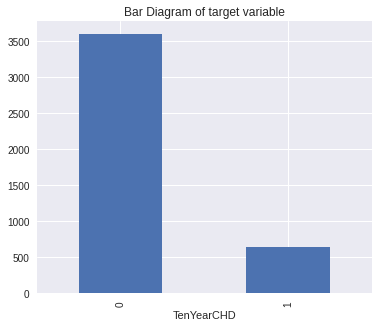

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=Data.groupby('TenYearCHD').size()
GroupedData.plot(kind='bar', figsize=(6,5))
plt.title('Bar Diagram of target variable')
plt.show()

In [5]:
Data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Visualization of Categorical Predictors

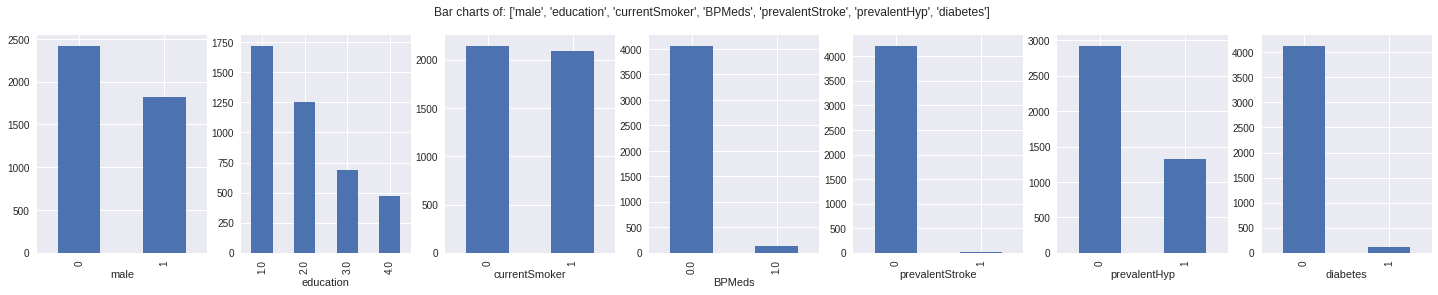

In [6]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(25,4))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=Data, colsToPlot=['male', 'education', 'currentSmoker', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes'])

### Visualization of Continuous Predictors

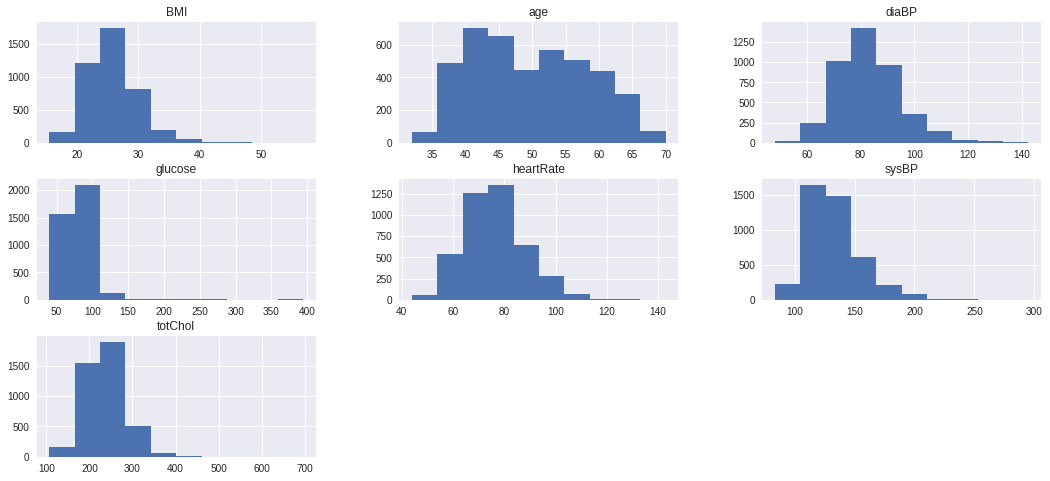

In [7]:
Data.hist(['age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'], figsize=(18,8))
plt.show()

### Visualization of Continuous Predictors by the target

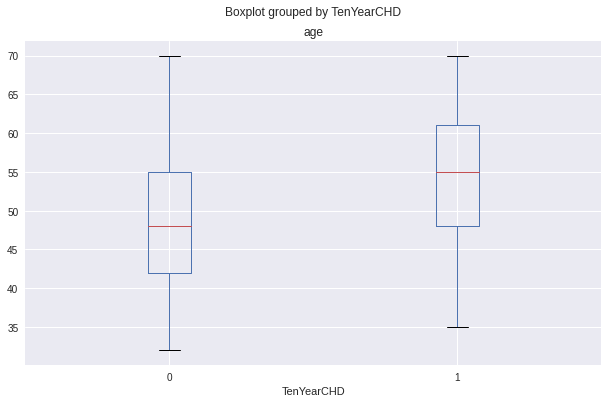

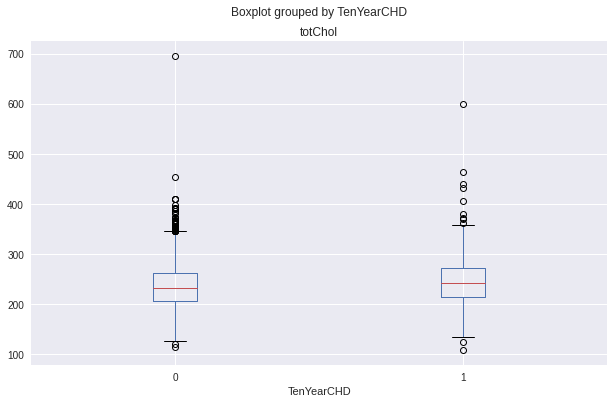

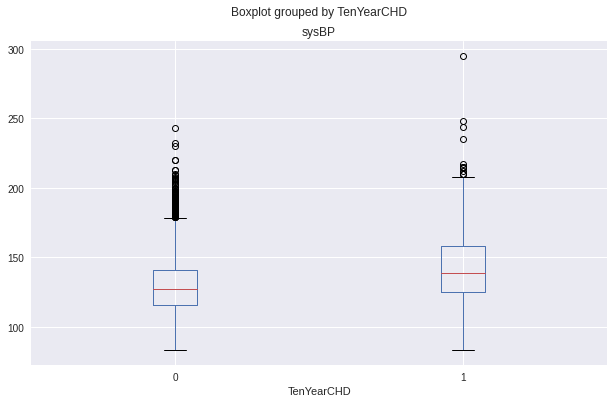

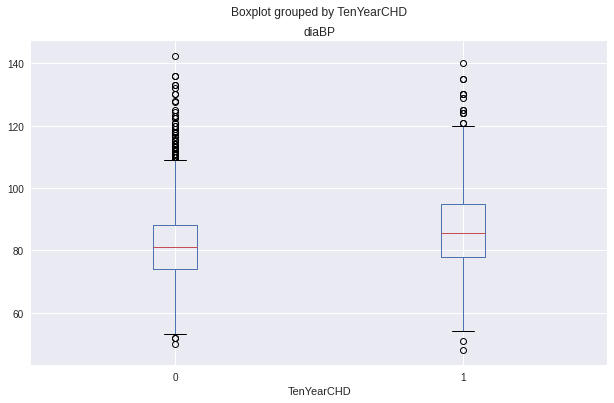

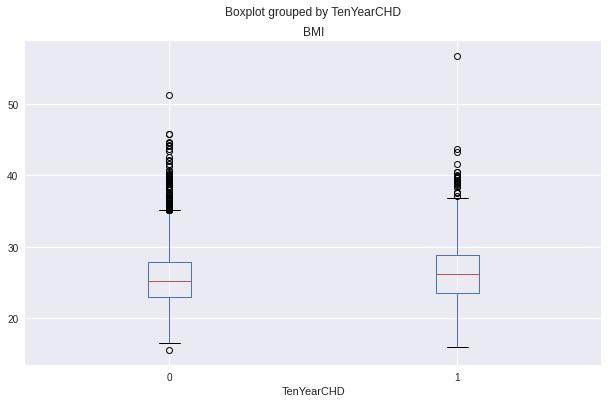

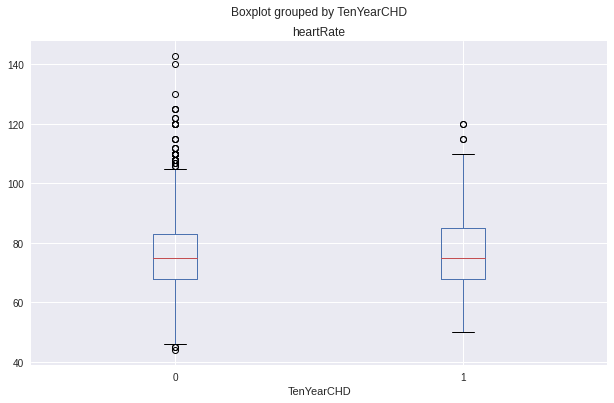

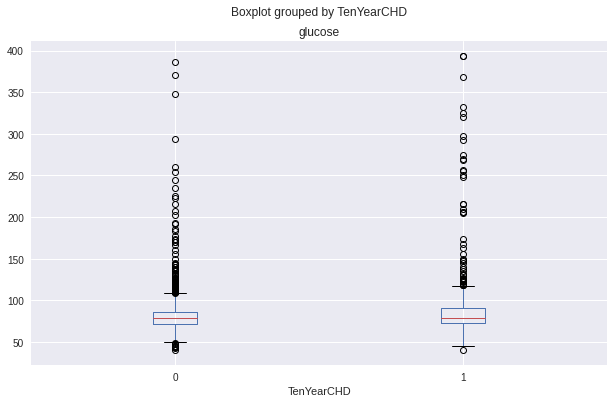

In [8]:
Data.boxplot(column='age', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='totChol', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='sysBP', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='diaBP', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='BMI', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='heartRate', by='TenYearCHD', figsize=(10,6), vert=True)
Data.boxplot(column='glucose', by='TenYearCHD', figsize=(10,6), vert=True)


### Outliar Treatment

In [9]:
Data['totChol'][Data['totChol']>=500] = 450
Data['sysBP'][Data['sysBP']>250] = 250
Data['BMI'][Data['BMI']>=50] = 45
Data['glucose'][Data['glucose']>300] = 300

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

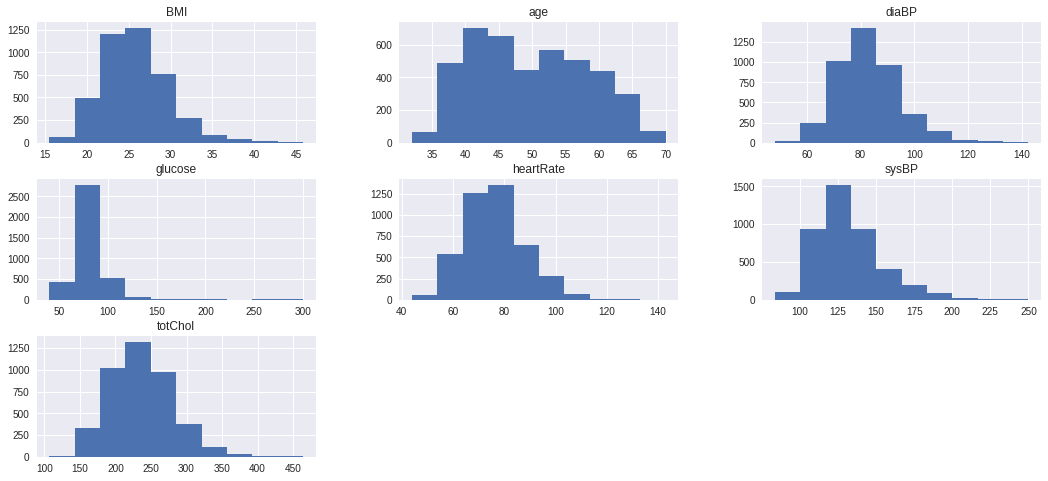

In [10]:
#Visualization after treating outliars
Data.hist(['age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'], figsize=(18,8))
plt.show()

### Missing value treatment

In [11]:
Data = Data.dropna()
Data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
GroupedData=Data.groupby('TenYearCHD')
GroupedData.mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424379,48.702999,2.007739,0.485005,8.762657,0.023863,0.004192,0.276040,0.020639,235.140922,130.285069,82.155272,25.639410,75.626572,80.551435
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.080790,143.900359,87.157989,26.548654,76.310592,88.134650


### Testing of significance for continuous predictors

In [13]:
def AutoAnova(InpData, targetCol, InputCol):
    
      from scipy.stats import f_oneway
      for col in InputCol:
        groupeddata = InpData.groupby(targetCol)[col].apply(list)
        aov = f_oneway(*groupeddata)
        if aov[1]<=0.05:
          print("One-way ANOVA P-Value for",col,"=",aov[1])

#ANOVA test to understant the dependency of price over each independent variable 
AutoAnova(Data,'TenYearCHD',['age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose'])

One-way ANOVA P-Value for age = 1.1227010347053483e-46
One-way ANOVA P-Value for totChol = 5.5195184599902864e-08
One-way ANOVA P-Value for sysBP = 3.4597497736623606e-42
One-way ANOVA P-Value for diaBP = 6.951220433918992e-20
One-way ANOVA P-Value for BMI = 9.473168449941693e-07
One-way ANOVA P-Value for glucose = 1.168853029003785e-13


### Testing of significance for categorical predictors

In [14]:
def AutoChi(InpData, targetCol, InputCol):
    from scipy.stats import chi2_contingency as ch
    for col in InputCol:
      CrossTab = pd.crosstab(index = InpData[col], columns=InpData[targetCol])
      ChSq = ch(CrossTab)
      if ChSq[1]<=0.05:
        print('Chi-Square test P-Value for',col,'=',ChSq[1])

AutoChi(InpData=Data, targetCol='TenYearCHD',InputCol=['male', 'education', 'currentSmoker', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes'])

Chi-Square test P-Value for male = 3.816765643320501e-08
Chi-Square test P-Value for education = 7.716846010437298e-07
Chi-Square test P-Value for BPMeds = 1.4573326046561633e-07
Chi-Square test P-Value for prevalentStroke = 0.008775828886339244
Chi-Square test P-Value for prevalentHyp = 9.161520374818205e-28
Chi-Square test P-Value for diabetes = 3.608262736322769e-08


### Treating the imbalance in target varable

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=24, ratio=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Subsetting the dataset into training and testing parts

In [16]:
# Separate Target Variable and Predictor Variables
Target='TenYearCHD'
Predictors=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

X=Data[Predictors].values
y=Data[Target].values

# Treating Imbalance
X,y = ros.fit_resample(X,y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=24)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3721, 15)
(3721,)
(2481, 15)
(2481,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
#Choose model parameters
model = LogisticRegression(C=2,penalty='l2',solver='newton-cg')  

#Building model on training data
LOG = model.fit(X_train,y_train)
pred_prob = LOG.predict_proba(X_test)
pred = []
for k in pred_prob:
  Probability = k[1]
  if k[1]>=0.5:
    pred.append(1)
  elif k[1]<0.5:
    pred.append(0)

#Measuring accuracy on training data
print(LOG.score(X_train,y_train))

#Measuring accuracy on testing data
print(LOG.score(X_test,y_test))
from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Probability']=Probability
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

0.6734748723461436
0.6739218057234986
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1244
           1       0.67      0.68      0.67      1237

    accuracy                           0.67      2481
   macro avg       0.67      0.67      0.67      2481
weighted avg       0.67      0.67      0.67      2481

[[834 410]
 [399 838]]
Accuracy of the model: 0.67


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Probability,PredictedTenYearCHD
0,1.0,58.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,207.0,110.0,80.0,23.55,78.0,78.0,0,0.574611,1
1,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,116.0,81.0,30.19,62.0,80.0,1,0.574611,0
2,0.0,60.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,154.0,82.0,27.82,93.0,90.0,0,0.574611,1
3,1.0,47.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,281.0,119.0,81.0,23.72,80.0,65.0,0,0.574611,0
4,1.0,45.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,157.0,98.0,26.63,88.0,80.0,0,0.574611,0


In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , pred)

0.6739317194644237

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      1244
           1       0.67      0.58      0.62      1237

    accuracy                           0.65      2481
   macro avg       0.65      0.65      0.65      2481
weighted avg       0.65      0.65      0.65      2481

[[888 356]
 [518 719]]
Accuracy of the model: 0.65


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,58.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,207.0,110.0,80.0,23.55,78.0,78.0,0,0
1,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,116.0,81.0,30.19,62.0,80.0,1,0
2,0.0,60.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,154.0,82.0,27.82,93.0,90.0,0,1
3,1.0,47.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,281.0,119.0,81.0,23.72,80.0,65.0,0,0
4,1.0,45.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,157.0,98.0,26.63,88.0,80.0,0,0


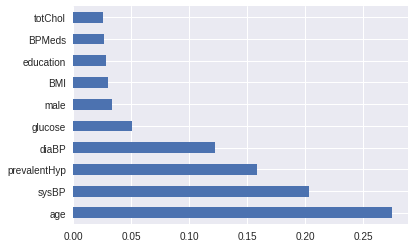

In [35]:
from sklearn.ensemble import RandomForestClassifier
#Choose model parameters
model = RandomForestClassifier(max_depth=2, n_estimators=1000, criterion='entropy')

#Building model on training data
RF = model.fit(X_train,y_train)
pred = RF.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()


## K-Nearest Neighbours(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)


#Building model on training data
KNN = model.fit(X_train,y_train)
pred = KNN.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1244
           1       0.76      0.93      0.83      1237

    accuracy                           0.82      2481
   macro avg       0.83      0.82      0.81      2481
weighted avg       0.83      0.82      0.81      2481

[[ 881  363]
 [  91 1146]]
Accuracy of the model: 0.81


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,58.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,207.0,110.0,80.0,23.55,78.0,78.0,0,1
1,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,116.0,81.0,30.19,62.0,80.0,1,1
2,0.0,60.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,154.0,82.0,27.82,93.0,90.0,0,0
3,1.0,47.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,281.0,119.0,81.0,23.72,80.0,65.0,0,0
4,1.0,45.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,157.0,98.0,26.63,88.0,80.0,0,0


## Support Vector Model (SVM)

In [19]:
from sklearn import svm

model = svm.SVC(C=10, kernel='rbf', gamma=0.01)


#Building model on training data
SVM = model.fit(X_train,y_train)
pred = SVM.predict(X_test)


from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, pred).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
#Works only for kernel = linear 
#%matplotlib inline
#feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Scaling the test data back to original scale
#Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults['Predicted'+ Target]=pred
TestingDataResults.head()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1244
           1       0.97      0.96      0.97      1237

    accuracy                           0.97      2481
   macro avg       0.97      0.97      0.97      2481
weighted avg       0.97      0.97      0.97      2481

[[1212   32]
 [  51 1186]]
Accuracy of the model: 0.97


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedTenYearCHD
0,1.0,58.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,207.0,110.0,80.0,23.55,78.0,78.0,0,0
1,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,116.0,81.0,30.19,62.0,80.0,1,1
2,0.0,60.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,154.0,82.0,27.82,93.0,90.0,0,0
3,1.0,47.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,281.0,119.0,81.0,23.72,80.0,65.0,0,0
4,1.0,45.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,157.0,98.0,26.63,88.0,80.0,0,0
